In [257]:
class Card:
    def __init__(self, suit, value):
        self.suit = suit
        self.value = value

    def display(self):
        if self.value in [11, 12, 13, 14]:
            display_value = {14: "Ace", 11: "Jack", 12: "Queen", 13: "King"}[self.value]
            print(f"{display_value} of {self.suit}")
        else:
            print(f"{self.value} of {self.suit}")

In [258]:
import random

In [259]:
suits = ['Hearts', 'Spades', 'Diamonds', 'Clubs']
values = list(range(2, 15))

In [260]:
class Deck:
    def __init__(self):
        self.cards = [Card(suit, value) for suit in suits for value in values]

    def shuffle(self):
        random.shuffle(self.cards)

    def draw(self):
        if len(self.cards) == 0:
            print("You cannot draw from an empty deck")
        else:
            draw_card = self.cards[0]
            self.cards = self.cards[1:]
            return draw_card

    def display(self):
        for card in self.cards:
            card.display()

In [261]:
class Player:
    def __init__(self, name):
        self.hand = []
        self.score = 0
        self.name = name

    def draw(self, card):
        self.hand.append(card)

    def display_hand(self):
        if len(self.hand) == 0:
            print(f"{self.name} has no cards")
        else:
            print(f"{self.name} has {len(self.hand)} cards:")
            for card in self.hand:
                card.display()

    def reset_hand(self):
        self.hand = []
        
    def predict(self, allowed):
        print(f"Possible guesses are {', '.join([str(x) for x in allowed])}")
        prediction = int(input("Enter your guess: "))
        
        while prediction not in allowed:
            prediction = int(input("Enter an allowed prediction: "))
        
        self.prediction = prediction
        print(f"{self.name} has made the prediction of {self.prediction}")
        return self.prediction

class Board:
    def __init__(self, players):
        self.deck = Deck()
        self.players = [Player(name) for name in players]
        self.table = []
        self.trump_card = None
        self.trump_suit = None

    def deal(self, cards):
        self.deck.shuffle()
        for _ in range(cards):
            for player in self.players:
                player.draw(self.deck.draw())
        
        self.trump_card = self.deck.draw()
        self.trump_suit = self.trump_card.suit

    def deal_to_table(self):
        card = self.deck.draw()
        self.table.insert(0, card)

    def reset(self):
        self.deck = Deck()
        for player in self.players:
            player.reset_hand()
            
    def rotate_players(self):
        self.players = self.players[1:] + self.players[:1]
    
    def get_predictions(self, n):
        predictions = []
        for i, player in enumerate(self.players):
            if i != len(self.players) - 1:
                allowed_predictions = list(range(0, n+1))
            else:
                disallowed_predict = n - sum(predictions)
                allowed_predictions = [p for p in range(0, n+1) if p != disallowed_predict]
            predictions.append(player.predict(allowed_predictions))


In [262]:
board = Board(['Player1', 'Player2'])

In [263]:
board.reset()
board.deal(7)

In [264]:
board.trump_card.display()
print(board.trump_suit)

7 of Clubs
Clubs


In [265]:
board.get_predictions(7)

Possible guesses are 0, 1, 2, 3, 4, 5, 6, 7
Enter your guess: 2
Player1 has made the prediction of 2
Possible guesses are 0, 1, 2, 3, 4, 6, 7
Enter your guess: 3
Player2 has made the prediction of 3


In [2]:
from scipy.stats import beta

In [6]:
import numpy as np

In [43]:
r = np.arange(0, 1.0, 0.01)

In [44]:
import matplotlib.pyplot as plt

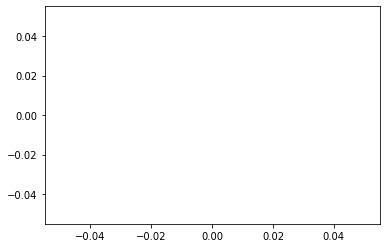

In [64]:
alpha = 15
m = 6
plt.plot(r, beta.pdf(r, alpha, b(m, alpha), scale=7))

In [46]:
beta.pdf(r, alpha, b(2, alpha)).mean()

nan

In [47]:
def b(mean, alpha):
    return (alpha - mean * alpha) / mean

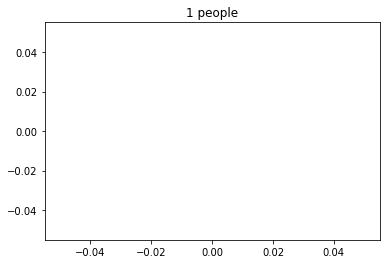

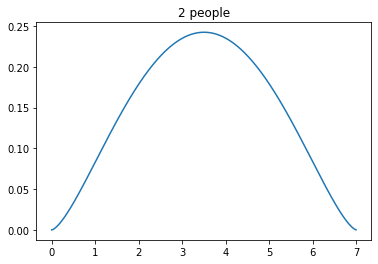

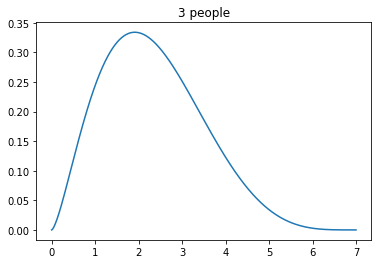

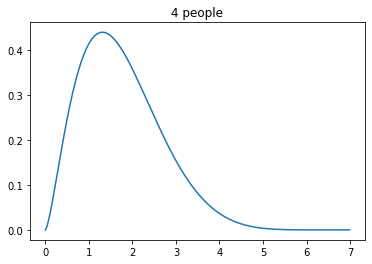

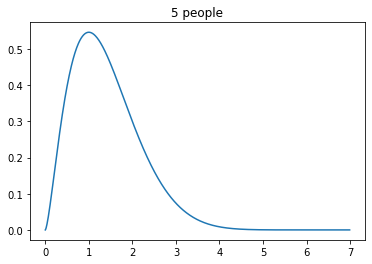

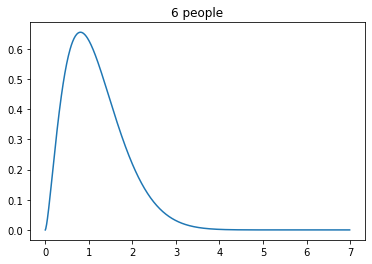

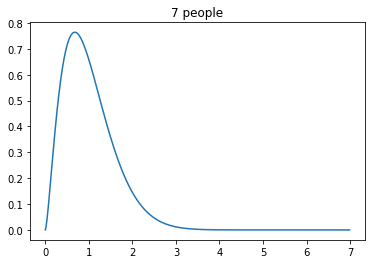

In [67]:
for n in range(1, 8):

    alpha = 2.5
    mean = 1/n
    plt.plot(r, beta.pdf(r, alpha, b(mean, alpha), scale=7))
    plt.title(f"{n} people")
    plt.show()


In [1]:
import lib

ImportError: cannot import name 'Player' from partially initialized module 'lib' (most likely due to a circular import) (/Users/georgematthys/Documents/Projects/upanddown/lib.py)